In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
import h5py

from keras.utils import np_utils
from keras import backend as K
from sklearn.cross_validation import train_test_split


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float)

## Training a Cyrillic Russian Alphabeth recognition Algorithm

In [2]:
Russian_1 = h5py.File('/Volumes/TAIWO/classification-of-handwritten-letters/LetterColorImages_123.h5', 'r')
Russian_2 = h5py.File('/Volumes/TAIWO/classification-of-handwritten-letters/LetterColorImages2.h5', 'r')
Russian_3 = h5py.File('/Volumes/TAIWO/classification-of-handwritten-letters/LetterColorImages3.h5', 'r')

In [3]:
dataset = Russian_1["images"]
dataset2 = Russian_2["images"]
dataset3 = Russian_3["images"]

In [4]:
dataset_labels = Russian_1["labels"]
dataset_labels2 = Russian_2["labels"]
dataset_labels3 = Russian_3["labels"]

In [5]:
ImageAll = []
LabelAll = []
for ii in range(dataset.shape[0]):
    ImageAll.append(dataset[ii])
    LabelAll.append(dataset_labels[ii])

In [6]:
for ii in range(dataset2.shape[0]):
    ImageAll.append(dataset2[ii])
    LabelAll.append(dataset_labels2[ii])

In [7]:
for ii in range(dataset3.shape[0]):
    ImageAll.append(dataset3[ii])
    LabelAll.append(dataset_labels3[ii])

In [8]:
from PIL import Image

In [9]:
import cv2
import numpy as np

In [34]:
type(ImageAll[200])

numpy.ndarray

In [10]:
cv2.imwrite("~/Desktop/Machine_Learning_Projects/TaiwoTest2.jpeg", ImageAll[2000])

True

In [32]:
im = Image.fromarray(ImageAll[200])


TypeError: Cannot handle this data type

In [ ]:
im.save("~/Desktop/Machine_Learning_Projects/TaiwoTest.jpeg")

In [ ]:
img.show()


In [102]:
ImageAll[0]

array([[[196., 186., 203.],
        [196., 188., 203.],
        [194., 187., 202.],
        ...,
        [191., 182., 198.],
        [193., 185., 200.],
        [193., 186., 201.]],

       [[192., 184., 201.],
        [193., 186., 203.],
        [192., 188., 204.],
        ...,
        [187., 181., 198.],
        [187., 183., 199.],
        [189., 185., 201.]],

       [[178., 172., 189.],
        [175., 170., 187.],
        [176., 172., 188.],
        ...,
        [178., 175., 191.],
        [179., 175., 191.],
        [180., 176., 192.]],

       ...,

       [[196., 186., 199.],
        [197., 187., 200.],
        [192., 183., 196.],
        ...,
        [182., 176., 191.],
        [181., 175., 190.],
        [177., 171., 187.]],

       [[197., 186., 198.],
        [196., 185., 197.],
        [196., 185., 197.],
        ...,
        [185., 176., 191.],
        [185., 176., 191.],
        [184., 175., 190.]],

       [[196., 185., 197.],
        [196., 186., 198.],
        [197., 1

In [16]:
import os
import cv2
path = "/Volumes/TAIWO/classification-of-handwritten-letters/Background_Empty"

In [105]:
os.chdir(path)
YY = [doc for doc in os.listdir() if doc.endswith(("png")) if not doc.startswith('.')]

In [106]:
YY

['33.png',
 '22.png',
 '44.png',
 '55.png',
 '11.png',
 '88.png',
 '77.png',
 '99.png',
 '100.png',
 '66.png',
 '113.png',
 '112.png',
 '114.png',
 '115.png',
 '111.png',
 '130.png',
 '120.png',
 '150.png',
 '160.png',
 '117.png',
 '200.png',
 '190.png',
 '220.png',
 '300.png',
 '180.png',
 '1000.png',
 '800.png',
 '500.png',
 '22_copy.png',
 '33_copy.png',
 '44_copy.png',
 '55_copy.png',
 '66_copy.png',
 '77_copy.png',
 '88_copy.png',
 '99_copy.png',
 '100_copy.png',
 '111_copy.png',
 '112_copy.png',
 '113_copy.png',
 '114_copy.png',
 '115_copy.png',
 '117_copy.png',
 '120_copy.png',
 '130_copy.png',
 '150_copy.png',
 '160_copy.png',
 '180_copy.png',
 '190_copy.png',
 '200_copy.png',
 '220_copy.png',
 '300_copy.png',
 '500_copy.png',
 '800_copy.png',
 '1000_copy.png',
 '11_copy.png']

In [108]:
full_size_image2 = cv2.imread("/Volumes/TAIWO/classification-of-handwritten-letters/Background_Empty/33.png")

In [109]:
full_size_image2

array([[[243, 232, 234],
        [243, 232, 234],
        [243, 232, 234],
        ...,
        [246, 235, 237],
        [246, 235, 237],
        [246, 235, 237]],

       [[243, 232, 234],
        [243, 232, 234],
        [243, 232, 234],
        ...,
        [246, 235, 237],
        [246, 235, 237],
        [246, 235, 237]],

       [[243, 232, 234],
        [243, 232, 234],
        [243, 232, 234],
        ...,
        [246, 235, 237],
        [246, 235, 237],
        [246, 235, 237]],

       ...,

       [[243, 232, 234],
        [243, 232, 234],
        [243, 232, 234],
        ...,
        [243, 233, 234],
        [242, 234, 235],
        [243, 233, 235]],

       [[242, 231, 233],
        [242, 231, 233],
        [242, 231, 233],
        ...,
        [243, 233, 235],
        [242, 234, 235],
        [243, 233, 235]],

       [[242, 231, 233],
        [242, 231, 233],
        [242, 231, 233],
        ...,
        [243, 233, 235],
        [242, 234, 235],
        [243, 233, 235]]

In [110]:
ZZ = cv2.resize(full_size_image2, (32,32), interpolation=cv2.INTER_CUBIC)/255

In [111]:
ZZ

array([[[0.95686275, 0.91372549, 0.92156863],
        [0.95294118, 0.90980392, 0.91764706],
        [0.95686275, 0.91372549, 0.92156863],
        ...,
        [0.96470588, 0.92156863, 0.92941176],
        [0.96470588, 0.92156863, 0.92941176],
        [0.96470588, 0.92156863, 0.92941176]],

       [[0.95686275, 0.91372549, 0.92156863],
        [0.95686275, 0.91372549, 0.92156863],
        [0.95294118, 0.90980392, 0.91764706],
        ...,
        [0.96470588, 0.92156863, 0.92941176],
        [0.96470588, 0.92156863, 0.92941176],
        [0.96470588, 0.92156863, 0.92941176]],

       [[0.95294118, 0.90980392, 0.91764706],
        [0.95686275, 0.91372549, 0.92156863],
        [0.95686275, 0.91372549, 0.92156863],
        ...,
        [0.96470588, 0.92156863, 0.92941176],
        [0.96470588, 0.92156863, 0.92941176],
        [0.96470588, 0.92156863, 0.92941176]],

       ...,

       [[0.95294118, 0.90980392, 0.91764706],
        [0.95294118, 0.90980392, 0.91764706],
        [0.95294118, 0

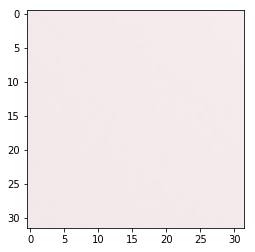

In [112]:
plt.figure()
plt.imshow(ZZ, interpolation='nearest', cmap='binary')

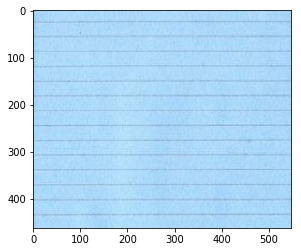

In [96]:
plt.figure()
plt.imshow(full_size_image2, interpolation='nearest', cmap='binary')

In [118]:
type(ImageAll)

list

In [115]:
Label1 = []
Label2 = []
for ii in YY:
    Label1.append(34)
    full_size_image = cv2.imread(path + "/" + ii)
    ZZ = cv2.resize(full_size_image, (32,32), interpolation=cv2.INTER_CUBIC)
    Label2.append(ZZ)

In [119]:
ImageAll.extend(Label2)

In [120]:
LabelAll.extend(Label1)

In [121]:
X4L = np.array(ImageAll)
X4L = X4L.astype('float32')
X7L = X4L/255

# Transforming the feature labels
#X5L = []
#for ii in range(len(X1L)):
#    if X1L[ii] == 'Cancer':
#        X5L.append(1)
#    elif X1L[ii] == 'No_Cancer':
#        X5L.append(0)
X5L = LabelAll
X6L = np.array(X5L)
y = np_utils.to_categorical(X6L)

num_classes = y.shape[1]


print("Transformation is done")

# Randomization and splitting of the dataset into a training dataset and a testing dataset
Xtrain, Xtest, ytrain, ytest = train_test_split( X7L,y, test_size = 0.2, random_state =0)

print("The shape of Xtrain[0] is: ", Xtrain[0].shape)
print("The shape of ytrain[0] is: ", ytrain[0].shape)

Transformation is done
The shape of Xtrain[0] is:  (32, 32, 3)
The shape of ytrain[0] is:  (35,)


In [122]:
Xtrain.shape

(21428, 32, 32, 3)

In [123]:
Xtest.shape

(5358, 32, 32, 3)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import os
import time
from PIL import Image
import sys
import tensorflow as tf
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import MaxPooling1D
print("Done Uploading all Packages")

Done Uploading all Packages


In [18]:
#5 Convolution
#2 Deep ANN
#Batch size of 32
#Input image shape 300x300x3
#Loss function - Binary cross-entropy


model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(35, activation='sigmoid'))
# Compilation of Model 
epochs = 20
lrate = 0.005
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [127]:
history3 = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=epochs, batch_size=4)
# Evaluation of Model -- Maybe Needs a graphical analysis also
scores = model.evaluate(Xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 21428 samples, validate on 5358 samples
Epoch 1/20
21428/21428 [==============================] - 772s 36ms/step - loss: 3.5094 - acc: 0.0327 - val_loss: 3.4548 - val_acc: 0.0426
Epoch 2/20
21428/21428 [==============================] - 813s 38ms/step - loss: 3.4151 - acc: 0.0547 - val_loss: 3.3639 - val_acc: 0.0618
Epoch 3/20
21428/21428 [==============================] - 771s 36ms/step - loss: 3.2793 - acc: 0.0770 - val_loss: 3.2688 - val_acc: 0.0797
Epoch 4/20
21428/21428 [==============================] - 787s 37ms/step - loss: 2.8565 - acc: 0.1705 - val_loss: 2.2968 - val_acc: 0.3108
Epoch 5/20
21428/21428 [==============================] - 754s 35ms/step - loss: 1.9249 - acc: 0.4237 - val_loss: 1.4285 - val_acc: 0.5870
Epoch 6/20
21428/21428 [==============================] - 753s 35ms/step - loss: 1.3192 - acc: 0.6034 - val_loss: 1.0080 - val_acc: 0.6868
Epoch 7/20
21428/21428 [==============================] - 741s 35ms/step - loss: 0.9198 - acc: 0.7177 - val_loss: 0.5

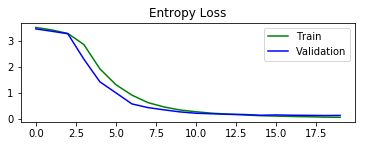

In [129]:
plt.subplot(212)
plt.title("Entropy Loss")
plt.plot(history3.history["loss"], color="g", label="Train")
plt.plot(history3.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

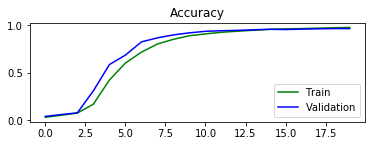

In [130]:
plt.subplot(212)
plt.title("Accuracy")
plt.plot(history3.history["acc"], color="g", label="Train")
plt.plot(history3.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")

In [8]:
from keras.models import model_from_json

/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [150]:
with open("model_Russian2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("~/Desktop/Machine_Learning_Projects/model_Russian2.h5")
print("Saved model to disk")

Saved model to disk


In [30]:

y_pred = loaded_model.predict(Xtrain[:2])

In [33]:
print(max(y_pred[0]))
print(max(y_pred[1]))
#max(y_pred[2])

0.9258191
0.004285855


In [34]:
y_pred[1]

array([2.7564151e-12, 7.2627930e-09, 2.3454649e-19, 1.8114079e-12,
       1.0563341e-06, 3.2784726e-08, 2.4119248e-10, 3.2496304e-11,
       5.5243311e-18, 1.0025995e-11, 1.2739153e-13, 7.3802286e-14,
       5.4950502e-19, 6.2571272e-15, 2.8188952e-14, 5.3180732e-17,
       3.8052468e-07, 1.1563576e-15, 7.6459169e-23, 1.3950551e-14,
       1.9460043e-17, 4.3560690e-13, 1.2370495e-10, 3.5392616e-11,
       8.4685219e-12, 1.8040559e-13, 4.8793968e-12, 5.8593303e-16,
       5.8657863e-11, 3.0705319e-19, 5.0985171e-12, 4.2858552e-03,
       7.0325155e-11, 2.8373357e-08], dtype=float32)

In [1]:
!mkdir ~/Desktop/FlaskBuilder

In [2]:
!cd /Desktop/FlaskBuilder

/bin/sh: line 0: cd: /Desktop/FlaskBuilder: No such file or directory


In [3]:
!cd ~/Desktop/FlaskBuilder

In [4]:
!mkdir ~/Desktop/FlaskBuilder/Static

In [35]:
!mkdir ~/Desktop/FlaskBuilder/Templates

In [36]:
!mkdir ~/Desktop/FlaskBuilder/Templates/tmp

### Splitting The Images into Sections for Recognition ###

In [37]:
from PIL import Image

In [38]:
INPUTFILE = "/Volumes/TAIWO/Writen_Names/"

In [39]:
INPUTFILE = "~/Desktop/11.png"

In [39]:
im = Image.open((INPUTFILE+ "VALENTIN.jpg"))

In [40]:
imgwidth,imgheight = im.size

In [41]:
print(imgwidth)

388


In [42]:
print(imgheight)

36


In [ ]:
for ii in range(0, imgwidth, 20):
    box = (ii,0,ii + 20,imgheight)
    a = im.crop(box)

In [43]:
box = (0,0,20,36)

In [44]:
a = im.crop(box)

In [50]:
Tmp_Img = Image.new('L', (32,36),255)

In [51]:
Tmp_Img.paste(a)

In [53]:
image_path = INPUTFILE + "Taiwo3.jpg"

In [54]:
Tmp_Img.save(image_path)

### This line of code is ready for breaking down the text(s) 

In [62]:
for ii in range(0, imgwidth, 15):
    box = (ii,0,ii+15,imgheight)
    a = im.crop(box)
    Tmp_Img = Image.new('L', (32,36),255)
    Tmp_Img.paste(a)
    
    image_path = INPUTFILE + "Taiwo" + str(ii) + ".jpg"
    Tmp_Img.save(image_path)

In [64]:
for ii in range(0, imgwidth, 35):
    box = (ii,0,ii+35,imgheight)
    a = im.crop(box)
    Tmp_Img = Image.new('L', (130,130),255)
    Tmp_Img.paste(a)
    
    image_path = INPUTFILE + "Taiwo" + str(ii) + ".png"
    Tmp_Img.save(image_path)
    count =0
    for iii in range(15):
        if ((ii > 15) | ((ii+15) > imgwidth)):
            box = ((ii-iii),0,ii,imgheight)
            Tmp_Img = Image.new('L', (130,130),255)
            Tmp_Img.paste(a)
            image_path = INPUTFILE + "Taiwo" + str(iii) + str(count) + ".png"
            Tmp_Img.save(image_path)
            count+=1
            
    for ix in range(15):
        if ((ii > 15) | ((ii+15) > imgwidth)):
            box = (ii,0,ii+ix,imgheight)
            Tmp_Img = Image.new('L', (130,130),255)
            Tmp_Img.paste(a)
            image_path = INPUTFILE + "Taiwo" + str(ix) + str(count) + ".png"
            Tmp_Img.save(image_path)
            count+=1
                   
    
    for ixx in range(15):
        if ((ii > 15) | ((ii+15) > imgwidth)):
            box = (ii-ixx,0,ii+ixx,imgheight)
            Tmp_Img = Image.new('L', (130,130),255)
            Tmp_Img.paste(a)
            image_path = INPUTFILE + "Taiwo" + str(ixx) + str(count) + ".png"
            Tmp_Img.save(image_path)
            count+=1